In [1]:
import pandas as pd
import arcgis
from arcgis.gis import GIS
from IPython.display import Image

%matplotlib inline

In [2]:
gis = GIS(username='dsl030_UCSDOnline')

Enter password: ········


# DSC 106 Final Project
## Starbucks vs. Tim Hortons in Toronto, Canada

## Read in data

In [3]:
starbucks = pd.read_csv('data/starbucks.csv')[['business_id', 'latitude', 'longitude', 'stars']]
horton = pd.read_csv('data/horton.csv')[['business_id', 'latitude', 'longitude', 'stars']]
reviews = pd.read_csv('data/reviews.csv').drop(columns=['cool', 'funny'])
reviews['date'] = pd.to_datetime(reviews['date'])
users = pd.read_csv('data/users.csv')[['elite', 'review_count', 'useful', 'user_id','yelping_since']]
users['yelping_since'] = pd.to_datetime(users['yelping_since'])
toronto = pd.read_csv('data/toronto.csv')
tor_reviews = pd.read_csv('data/tor_reviews.csv')
tor_reviews['date'] = pd.to_datetime(tor_reviews['date'])
tor_reviews['year'] = tor_reviews['date'].dt.year

In [4]:
starbucks_reviews = starbucks.merge(reviews, on='business_id', how='left').merge(users, on='user_id', how='left')
starbucks_reviews['year'] = starbucks_reviews.date.dt.year
horton_reviews = horton.merge(reviews, on='business_id', how='left').merge(users, on='user_id', how='left')
horton_reviews['year'] = horton_reviews.date.dt.year

## 1. Overall Ratings
What are the overall ratings of these two chain stores in Toronto?

In [5]:
starbucks.stars.mean()

3.365625

In [6]:
horton.stars.mean()

2.725

## 2. Elite Users
Yelp classifies certain users as "elite," deeming them more credible than others. How many of our reviewers are considered "elite?"

In [32]:
reviews_users = reviews.merge(users, on='user_id', how='left')

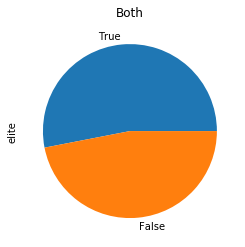

In [33]:
reviews_users_prop = reviews_users.elite.notna().value_counts()
# display(reviews_users_prop)
reviews_users_prop.plot.pie(title='Both');

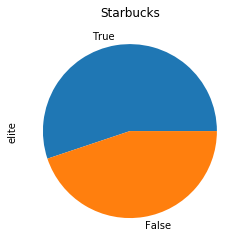

In [34]:
starbucks_reviews_prop = starbucks_reviews.elite.notna().value_counts()
# display(starbucks_reviews_prop)
starbucks_reviews_prop.plot.pie(title='Starbucks');

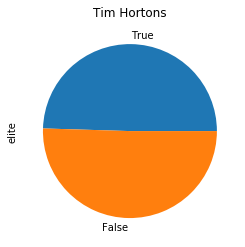

In [35]:
horton_reviews_prop = horton_reviews.elite.notna().value_counts().sort_index(ascending=False)
# display(horton_reviews_prop)
horton_reviews_prop.plot.pie(title='Tim Hortons');

## 3. Overall Ratings (Only Elite Users)
Do the ratings change if we only consider elite users?

In [11]:
starbucks_reviews_useful = starbucks_reviews[starbucks_reviews.elite.notna()]
horton_reviews_useful = horton_reviews[horton_reviews.elite.notna()]

In [12]:
print('Starbucks Elite Rating:', starbucks_reviews_useful.stars_y.mean())

Starbucks Elite Rating: 3.5113871635610767


In [13]:
print('Starbucks Elite Rating:', horton_reviews_useful.stars_y.mean())

Starbucks Elite Rating: 3.095890410958904


## 4. Gain in popularity? 
### line: rating vs date

In [14]:
starbucks_reviews_useful = starbucks_reviews[starbucks_reviews.elite.notna()]
horton_reviews_useful = horton_reviews[horton_reviews.elite.notna()]

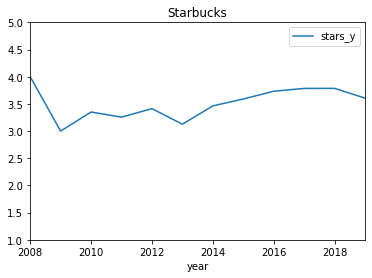

In [15]:
# display(starbucks_reviews_useful.groupby('year')['stars_y'].mean())
starbucks_reviews_useful.groupby('year')['stars_y'].mean().reset_index().plot(x='year', y='stars_y', ylim=(1, 5), title='Starbucks');

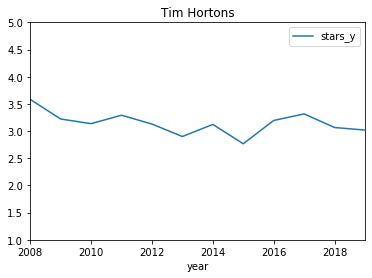

In [16]:
# display(horton_reviews_useful.groupby('year')['stars_y'].mean())
horton_reviews_useful.groupby('year')['stars_y'].mean().reset_index().plot(x='year', y='stars_y', ylim=(1, 5), title='Tim Hortons');

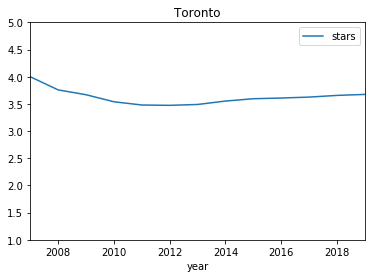

In [17]:
# display(tor_reviews.groupby('year')['stars'].mean())
tor_reviews.groupby('year')['stars'].mean().reset_index().plot(x='year', y='stars', ylim=(1,5), title='Toronto');

### line: num reviews vs date

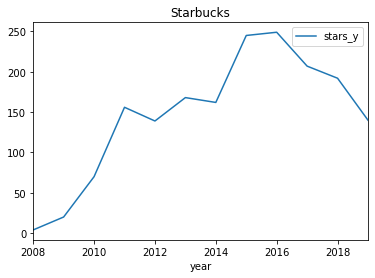

In [18]:
# display(starbucks_reviews.groupby('year')['stars_y'].count())
starbucks_reviews.groupby('year')['stars_y'].count().reset_index().plot(x='year', y='stars_y', title='Starbucks');

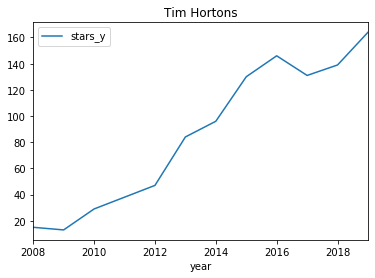

In [19]:
# display(horton_reviews.groupby('year')['stars_y'].count())
horton_reviews.groupby('year')['stars_y'].count().reset_index().plot(x='year', y='stars_y', title='Tim Hortons');

## 5. Wordclouds

In [20]:
# run if downloading for first time
# import nltk
# nltk.download('stopwords')

In [21]:
from nltk.corpus import stopwords
import re
import numpy as np

stop = stopwords.words('english')

In [22]:
rev_text = reviews.text.apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop]))
star_text = starbucks_reviews.text.apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop]))
hort_text = horton_reviews.text.apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop]))

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(star_text)
arr1 = tfidf.transform(star_text).toarray()
star_vals = pd.DataFrame(arr1, columns=tfidf.get_feature_names(), index=star_text.index).idxmax(axis=1)

tfidf = TfidfVectorizer()
tfidf.fit(hort_text)
arr2 = tfidf.transform(hort_text).toarray()
hort_vals = pd.DataFrame(arr2, columns=tfidf.get_feature_names(), index=hort_text.index).idxmax(axis=1)

In [24]:
star_vals.value_counts().head(10)

drink      8
store      6
mall       6
milk       6
drive      5
usually    5
order      5
parking    5
water      5
sit        5
dtype: int64

In [25]:
hort_vals.value_counts().head(10)

double       11
coffee        7
always        7
tims          7
doughnuts     7
ice           6
line          6
location      6
donuts        6
tea           5
dtype: int64

## 6. GeoData
Basic exploration with geodata, scratched because messy

In [13]:
starbucks.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,17-66 Wellington Street W,"{'RestaurantsPriceRange2': '2', 'WiFi': ""'free...",CSaB0_tKunqfcOqbw5FdAw,"Food, Coffee & Tea",Toronto,"{'Monday': '5:30-19:0', 'Tuesday': '5:30-19:0'...",1,43.647923,-79.381353,Starbucks,M5J 2W4,8,4.0,ON
1,139 Yorkville Ave,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...",X6Cgn59q3i3vK-lqzVY6gQ,"Cafes, Restaurants, Food, Coffee & Tea",Toronto,NaN,1,43.745437,-79.406571,Starbucks,M5R 1C4,3,3.0,ON
2,"1 First Canadian Place, 77 Adelaide Street W","{'WiFi': ""'free'"", 'BikeParking': 'True', 'Out...",PNzGMlH0SnvIMxIESVNLgw,"Food, Coffee & Tea",Toronto,NaN,1,43.648420,-79.381900,Starbucks,M5X 1C1,3,4.0,ON
3,1606-25 The West Mall,"{'NoiseLevel': ""u'loud'"", 'Caters': 'False', '...",jVJcR4y8q7FuwlK0cYVuyw,"Restaurants, Food, Cafes, Coffee & Tea",Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",1,43.612899,-79.555735,Starbucks,M9C 1B8,15,3.0,ON
4,205 Humber College Boulevard,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...",POuD26KrQ_ssxKuSFfXY0A,"Coffee & Tea, Food, Bakeries",Toronto,"{'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'...",1,43.729443,-79.607311,Starbucks,M9W 5L7,6,2.5,ON


In [30]:
map1 = gis.map('Toronto', zoomlevel=10)

tor = gis.content.get('5fa0e4d94e3147b1b957b0d84641c7a1').layers[0]
tor_sdf = pd.DataFrame.spatial.from_layer(tor)[['SHAPE']]
tor_sdf['loc'] = ['tor'] * len(tor_sdf)
tor_sdf.spatial.plot(map1, cmap='Pastel1', cstep=3, line_width=0, alpha=0.5)

# starbucks_sdf = pd.DataFrame.spatial.from_xy(starbucks, 'longitude', 'latitude')
# starbucks_sdf.spatial.plot(map1, cmap='Set1', cstep=2, line_width=0.3, alpha=0.9, marker_size=5)

horton_sdf = pd.DataFrame.spatial.from_xy(horton, 'longitude', 'latitude')
horton_sdf.spatial.plot(map1, cmap='Set1', cstep=0, line_width=0.3, alpha=0.7, marker_size=5)

True

In [31]:
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

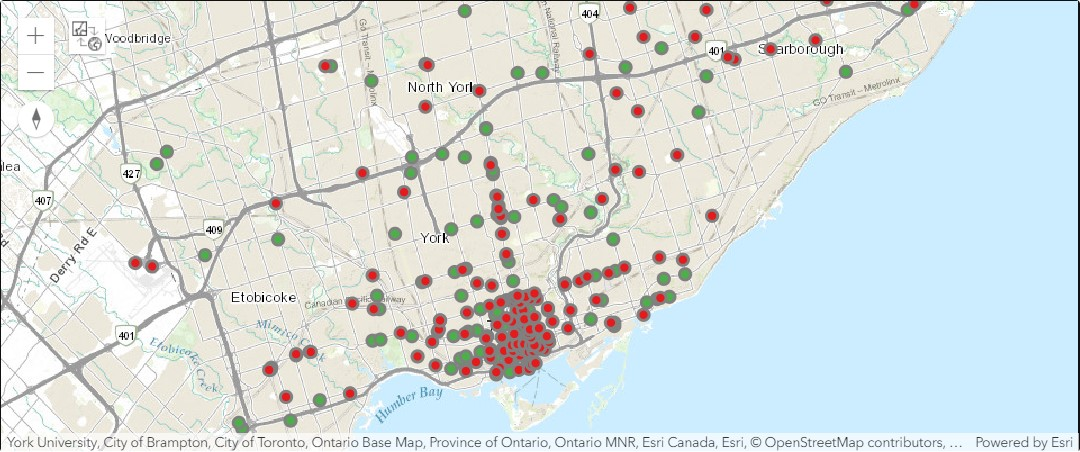

In [43]:
Image('data/map.jpg')